## 视觉组第一次培训(opencv及图像基础)

import cv2
import numpy as np

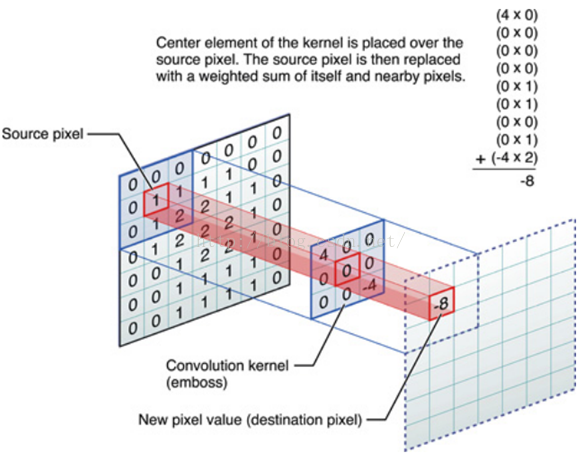

## cv2.imread()
有两个参数：
* 路径
* 通道 
    * 1 BGR(只有OPENCV里是BGR 其他库是RGB)
    * 0 Gray 
    * -1 Alpha

In [1]:
import cv2
import numpy as np
img_bgr = cv2.imread(r"C:\Users\dell\Desktop\teach_vision\og.jpg",1) 
img_gray = cv2.imread(r"C:\Users\dell\Desktop\teach_vision\og.jpg",0) 
img_alpha = cv2.imread(r"C:\Users\dell\Desktop\teach_vision\og.jpg",-1) 

#img_bgr = cv2.resize(img_bgr,(0,0),fx=0.5,fy=0.5)
img_bgr = cv2.resize(img_bgr,(640,480))

## cv2.waitKey(),cv2.imshow()

In [3]:
cv2.imshow('img_bgr',img_bgr)
cv2.imshow('img_gray',img_gray)
cv2.imshow('img_alpha',img_alpha)
#延迟单位ms
#cv2.waitkey(0)
#cv2.waitkey(1)q
key = cv2.waitKey(1)
# 在waitKey的延迟时间内如果有键盘读入返回值就是输入值
#Press esc or 'q' to close the image window

if key & 0xFF == ord('q') or key == 27:
    cv2.destroyAllWindows()

## 图像滤波


   **图像滤波**： 在某些情况下，图像像素间的颜色变动会很大可能会影响后续的一些图像处理结果，因此我们需要利用滤波方法平滑处理或是保留一些需要的特征。
    其中的滤波器也就是卷积核
    
* **均值滤波**：均值滤波本身存在着固有的缺陷，即它不能很好地保护图像细节，在图像去噪的同时也破坏了图像的细节部分，从而使图像变得模糊，不能很好地去除噪声点。特别是椒盐噪声
* **高斯滤波**：高斯滤波和均值滤波一样，都是利用一个掩膜和图像进行卷积求解。不同之处在于：均值滤波器的模板系数都是相同的为1，而高斯滤波器的模板系数，则随着距离模板中心的增大而系数减小（服从二维高斯分布）。所以，高斯滤波器相比于均值滤波器对图像的模糊程度较小，更能够保持图像的整体细节。
* **中值滤波**：中值滤波会取当前像素点及其周围临近像素点的像素值，一般有奇数个像素点，将这些像素值排序，将排序后位于中间位置的像素值作为当前像素点的像素值。中值滤波对于斑点噪声（speckle noise）和椒盐噪声（salt-and-pepper  noise）来说尤其有用，因为它不依赖于邻域内那些与典型值差别很大的值，而且噪声成分很难被选上，所以可以在几乎不影响原有图像的情况下去除全部噪声。但是由于需要进行排序操作，中值滤波的计算量较大。

dst = cv2.GaussianBlur( src, ksize, sigmaX, sigmaY, borderType )

In [2]:
img_gaus =cv2.GaussianBlur(img_bgr,(7,7),1.5)
# img = np.hstack((img_bgr,img_gaus))
# cv2.imshow('img', img)
# cv2.waitKey(100)

## 颜色筛选
 

In [3]:
low_hsv = np.array([25,73,19])
high_hsv = np.array([98,156,255])
# inRange(img,low_hsv,high_hsv)：介于low / high 之间的为白色(255)，其余黑色(0)
mask = cv2.inRange(img_gaus,low_hsv,high_hsv)
res = cv2.bitwise_and(img_gaus,img_gaus,mask=mask)
cv2.imshow('res',res)
cv2.waitKey(0)

-1

## 图像形态学处理方法
图像的形态学运算可以对图像进行预处理（去噪声、简化形状)
主要是基于二值化图像处理

**膨胀运算**：
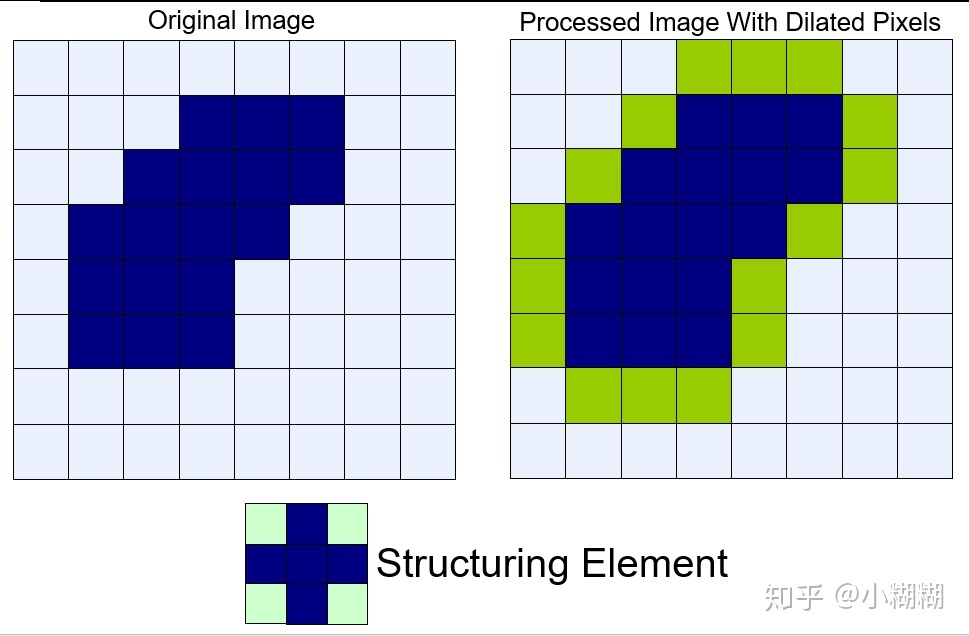
**腐蚀运算**：
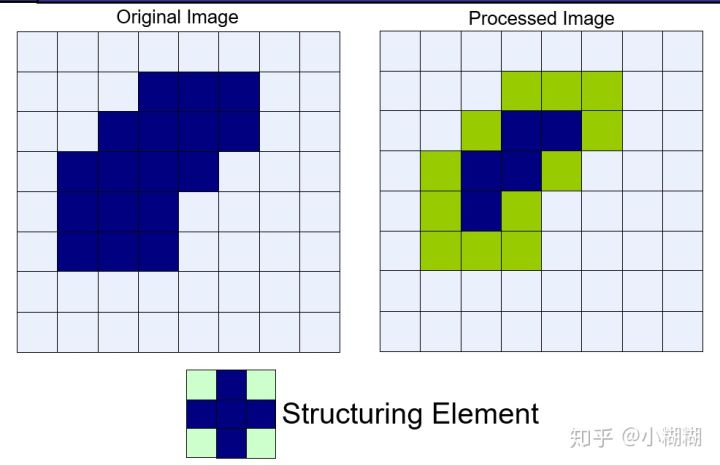
**开运算**
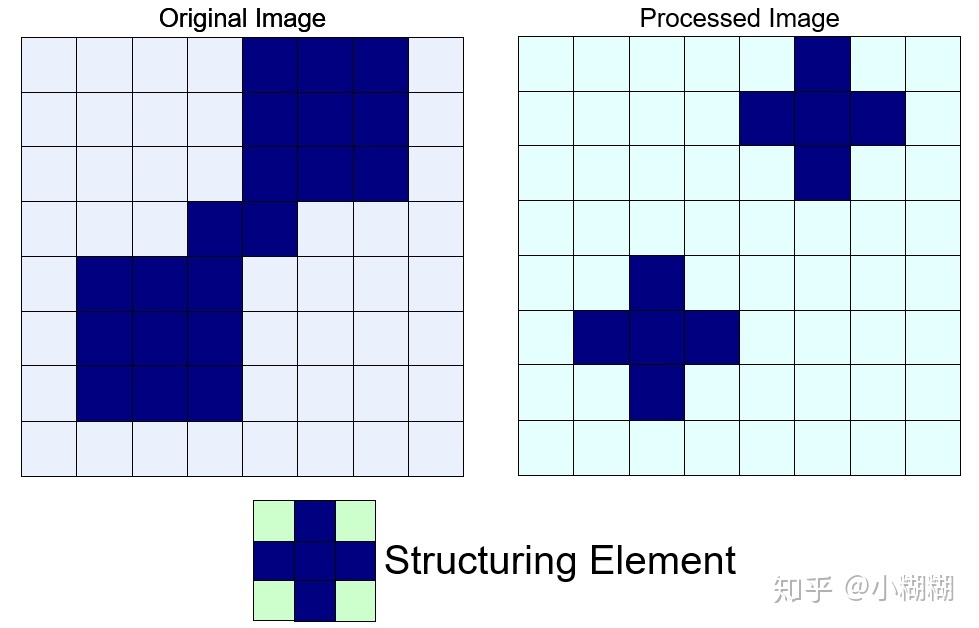
先腐蚀图像，在对图像进行膨胀。能够去除孤立的小点、毛刺和连接两块区域的小点，消除小物体、平滑较大物体的边界。这种图像处理方式不是信息无损的，一般不等于原始图像。

**闭运算**
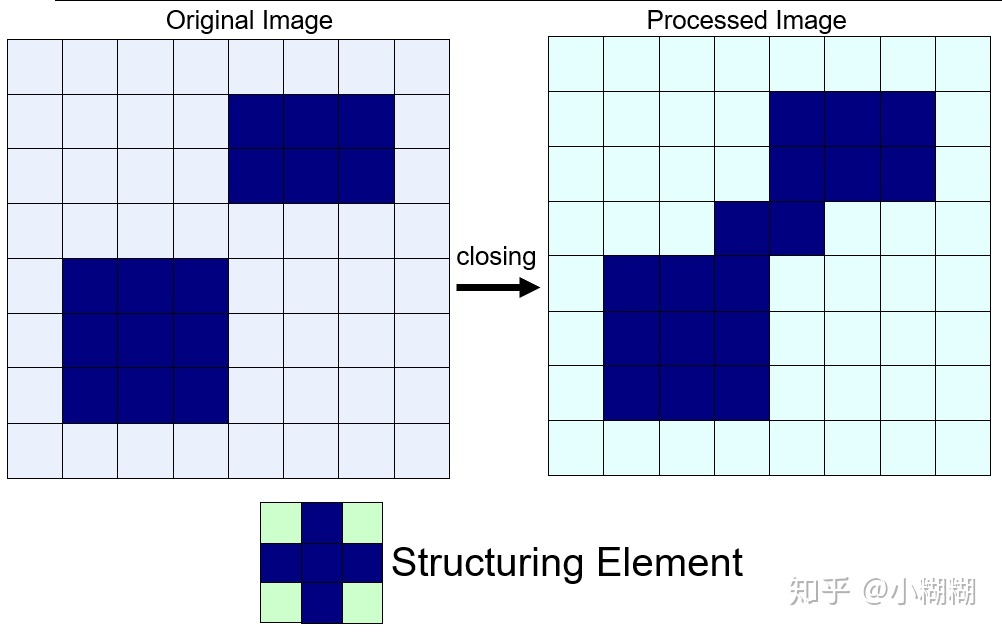
先膨胀图像，然后对图像进行腐蚀。其功能是来填充物体内的细小空洞，连接邻近的物体，平滑边界，同时不明显改变面积。

In [4]:
import cv2
import numpy as np
kernel = np.ones((9,9),np.uint8)
img = cv2.imread(r"C:\Users\dell\Desktop\teach_vision\fb.png",0)
#这些操作针对的是白色部分在这里将原图黑白反转一下
img = cv2.bitwise_not(img,img)
erode = cv2.erode(img, kernel)
dilate = cv2.dilate(img,kernel)
Mopen = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
Mclose = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
cv2.imshow('img', img)
cv2.imshow('erode', erode)
cv2.imshow('dilate', dilate)
cv2.imshow('MO', Mopen)
cv2.imshow('MC', Mclose)
cv2.waitKey(0)

-1

In [4]:
import cv2
import numpy as np
img = cv2.imread(r"C:\Users\dell\Desktop\teach_vision\fb.png",0)
kernel1 = np.ones((9,9),np.uint8)
img1 = cv2.erode(img,kernel1)
kernel2 =np.zeros((9,9),np.uint8)
img2 = cv2.erode(img,kernel2)
cv2.imshow("11",img1)
cv2.imshow('2',img2)
cv2.imshow('3',img)
cv2.waitKey(0)

-1

## 边缘检测

### cv2.Canny()

## 轮廓识别

### cv2.findContours()

## 直线检测
### cv2.HoughLines()
**cv2.HoughLines(image, rho, theta, threshold, lines=None)** 

**lines**: lines[i][0]为第i条直线的rho，lines[i][1]表示第i条直线的theta

**rho:**像素精度，一般设置为1；

**theta：**角度精度，一般设置为CV_PI/180;

**threshold:**表示累计的像素达到多少才能形成直线；


In [5]:
import cv2
import numpy as np
img =cv2.imread(r"C:\Users\dell\Desktop\teach_vision\fb.png",0)
canny = cv2.Canny(img, 30, 150)
#在此之前加上前面所讲的一些预处理方法会不会更好
lines = cv2.HoughLines(canny,1,np.pi/180,90)
lines = lines[:,0,:]
print(lines)
for rho, theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 3000 * (-b))
    y1 = int(y0 + 3000 * (a))
    x2 = int(x0 - 3000 * (-b))
    y2 = int(y0 - 3000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
cv2.imshow('img',img)
cv2.waitKey(0)

[[3.5100000e+02 0.0000000e+00]
 [1.8500000e+02 1.7453292e-02]]


-1

### Hough本身由于其算法的特性，会比较慢，想要对此有更多了解可以去看看更多高效的算法LSD等。
但是Hough却为我们提供了一种较好的思路。

小作业： 完成圆的检测识别


### 运动预测--卡尔曼滤波

**深入理解可以看这个视频：**https://www.bilibili.com/video/BV1ez4y1X7eR?spm_id_from=333.337.search-card.all.click&vd_source=257c5c06d76ae2683e341813f555c6a2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
delta = 0.022
Z_raw = [20*(i*delta) - 0.5*9.8*(delta*i)**2 for i in range(300)]
noise = np.round(np.random.normal(0, 30, 300), 5)
Z = np.mat(Z_raw) + np.mat(noise)

class kalmanfilter():
    def __init__(self, delta):
        self.delta = delta
        self.X = np.mat([[0, ], [0, ]])
        self.P = np.mat([[1, 0], [0, 1]])
        self.F = np.mat([[1, self.delta], [0, 1]])
        self.R = np.mat([5])
        self.H = np.mat([1, 0])
        self.Q = np.mat([[0.1, 0],[0, 0.1]])
        self.U = np.mat([[-9.8*0.5*self.delta**2], [-9.8* self.delta]])
        self.res = []
    def calkalman(self, z):
        x_predict = self.F * self.X + self.U
        p_predict = self.F * self.P * self.F.T + self.Q
        K = p_predict * self.H.T/(self.H * p_predict *self.H.T + self.R)
        self.X = x_predict + K * (z - self.H * x_predict)
        P = (np.eye(2) - K * self.H) * p_predict
        self.res.append(self.X[0, 0])
    def predict(self):
        print("-----\n预测：\n")
        for i in range(200):
            #self.X = self.F * self.X + self.U
            self.X = self.F * self.X  + self.U
            self.res.append(self.X[0, 0])


kalf = kalmanfilter(delta)
for i in range(300):
    kalf.calkalman(Z[0, i])
print(kalf.X)
kalf.predict()

t = [i for i in range(500)]

reality = []
plt.plot(t, kalf.res)
plt.plot([i for i in range(300)], Z_raw)
for i in range(300):
    reality.append(Z[0, i])
plt.plot([i for i in range(300)], reality, color='green')
plt.show()
# import matplotlib.pyplot as plt
# posList = [[1,2,3], [3,5,6], [8,9,8], [10,5,4]]
# plt.clf()
# fig = plt.gcf()
# ax = fig.gca(projection='3d')
# for i in range(len(posList)):
#     ax.scatter(posList[i][0], posList[i][1], posList[i][2], c='r', marker='o', linewidth=4)
#     i += 1
# plt.pause(5)
# plt.ioff()

## 视频
### cv2.VideoCapture(0)

0 ：调用摄像头
路径：读取视频 

In [6]:
import cv2
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    cv2.imshow("Video", img)
    if cv2.waitKey(1)&0xFF==ord('q'):
        break

## IntelRealsense

In [1]:
import pyrealsense2 as rs
import numpy as np
import cv2

W = 640
H = 480

pc = rs.pointcloud()
points = rs.points()

pipeline = rs.pipeline()  # 创建一个管道
config = rs.config()  # Create a config并配置要流​​式传输的管道。
config.enable_stream(rs.stream.depth, W, H, rs.format.z16, 15)
config.enable_stream(rs.stream.color, W, H, rs.format.bgr8, 15)
'''
self: pyrealsense2.pyrealsense2.config, 
stream_type: pyrealsense2.pyrealsense2.stream, 
stream_index: int, width: int, height: int, 
format: pyrealsense2.pyrealsense2.format=format.any, 
framerate: int=0
'''
# 使用选定的流参数显式启用设备流

# Start streaming 开启流
pipe_profile = pipeline.start(config)
'''      流水线循环从设备捕获样本，然后根据每个模块的要求和线程模型，将它们传递到连接的计算机视觉模块和处理模块。
         在循环执行期间，应用程序可以通过调用wait_for_frames（）或poll_for_frames（）来访问摄像机流。
         流循环一直运行到管道停止为止。
'''
# Create an align object 创建对其流对象
# "rs.align" allows us to perform alignment of depth frames to others frames
# The "align_to" is the stream type to which we plan to align depth frames.
# (对其流)
align_to = rs.stream.color
align = rs.align(align_to)  # 设置为其他类型的流,意思是我们允许深度流与其他流对齐
# print(type(align))
cap = cv2.VideoCapture(0)

"the parameter is the monitoring position"
def led_practice(x_axis,y_axis):

    while True:

        frames = pipeline.wait_for_frames()  # 等待开启通道,等到新的一组帧集可用为止
        aligned_frames = align.process(frames)  # 将深度框和颜色框对齐
        depth_frame = aligned_frames.get_depth_frame()  # ?获得对齐后的帧数深度数据(图)
        color_frame = aligned_frames.get_color_frame()  # ?获得对齐后的帧数颜色数据(图)
        img_color = np.asanyarray(color_frame.get_data())  # 把图像像素转化为数组
        img_depth = np.asanyarray(depth_frame.get_data())  # 把图像像素转化为数组

        # self: pyrealsense2.pyrealsense2.stream_profile -> rs2::video_stream_profile
        # intrinsics 获取流配置文件的内在属性。
        depth_intrin = depth_frame.profile.as_video_stream_profile().intrinsics
        color_intrin = color_frame.profile.as_video_stream_profile().intrinsics
        #get_extrinsics_to 获取两个配置文件之间的外部转换（代表物理传感器）
        depth_to_color_extrin = depth_frame.profile.get_extrinsics_to(color_frame.profile)

        # 获取深度传感器的深度标尺
        depth_sensor = pipe_profile.get_device().first_depth_sensor()
        depth_scale = depth_sensor.get_depth_scale() # 深度比例系数为： 0.0010000000474974513
        print("scale:", depth_scale)


        # 由深度到颜色
        depth_pixel = [x_axis,y_axis]  # specified pixel
        # rs2_deproject_pixel_to_point获取实际空间坐标 specified point
        depth_point = rs.rs2_deproject_pixel_to_point(depth_intrin, depth_pixel, depth_scale)
        print(depth_point)
        # perspective conversion
        color_point = rs.rs2_transform_point_to_point(depth_to_color_extrin, depth_point)
        # 3D space to XY pixels
        color_pixel = rs.rs2_project_point_to_pixel(color_intrin, color_point)

        pc.map_to(color_frame) # 将点云映射到给定的颜色帧
        points = pc.calculate(depth_frame)  # 生成深度图的点云和纹理映射
        "points.get_vertices() 检索点云的顶点, asanyarray is similar with array"
        vtx = np.asanyarray(points.get_vertices())  # transfor into XYZ
        # tex = np.asanyarray(points.get_texture_coordinates()) # texture map

        # ??????? coordinate transform
        # line by line
        i = W * y_axis + x_axis

        # column by column
        # i = H * x_axis + y_axis

        cv2.circle(img_color, (x_axis, y_axis), 8, [255, 0, 255], thickness=-1)

        cv2.putText(img_color, "Distance/cm:"+str(img_depth[x_axis, y_axis]), (40, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.2, [255, 0, 255])
        cv2.putText(img_color, "X:"+str(np.float64(vtx[i][0])), (80, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, [255, 0, 255])
        cv2.putText(img_color, "Y:"+str(np.float64(vtx[i][1])), (80, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, [255, 0, 255])
        cv2.putText(img_color, "Z:"+str(np.float64(vtx[i][2])), (80, 160), cv2.FONT_HERSHEY_SIMPLEX, 1, [255, 0, 255])
        print('Distance: ',img_depth[x_axis, y_axis]/10)

        cv2.imshow('depth_frame', img_color)
        cv2.imshow("dasdsadsa", img_depth)

        key = cv2.waitKey(1)
        if key == 27:
            cv2.destroyAllWindows()
            break

led_practice(int(W/2), int(H/2))
cv2.waitKey(0)
cv2.destroyAllWindows()
pipeline.stop()

RuntimeError: No device connected